In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv('hepatitis.csv')

# Display the first few rows of the dataset
data.head()

,ID,target,age,gender,steroid,antivirals,fatigue,malaise,anorexia,liverBig,...,spleen,spiders,ascites,varices,bili,alk,sgot,albu,protime,histology
0,1,2,30,2,1,2,2,2,2,1,...,2,2,2,2,1,85,18,4,?,1
1,2,2,50,1,1,2,1,2,2,1,...,2,2,2,2,0.9,135,42,3.5,?,1
2,3,2,78,1,2,2,1,2,2,2,...,2,2,2,2,0.7,96,32,4,?,1
3,4,2,31,1,?,1,2,2,2,2,...,2,2,2,2,0.7,46,52,4,80,1
4,5,2,34,1,2,2,2,2,2,2,...,2,2,2,2,1,?,200,4,?,1


### 1. Loading and Understanding the Data

In [2]:
# Replace '?' with NaN
data.replace('?', pd.NA, inplace=True)

# Convert appropriate columns to numeric types
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = pd.to_numeric(data[col], errors='coerce')

# Drop rows with missing target values
data.dropna(subset=['target'], inplace=True)

# Display summary statistics
data.describe(include='all')

,ID,target,age,gender,steroid,antivirals,fatigue,malaise,anorexia,liverBig,...,spleen,spiders,ascites,varices,bili,alk,sgot,albu,protime,histology
count,155.000000,155.000000,155.000000,155.000000,154.000000,155.000000,154.000000,154.000000,154.000000,145.000000,...,150.00000,150.000000,150.000000,150.00000,149.000000,126.000000,151.00000,139.000000,88.000000,155.000000
mean,78.000000,1.793548,41.200000,1.103226,1.506494,1.845161,1.350649,1.603896,1.792208,1.827586,...,1.80000,1.660000,1.866667,1.88000,1.427517,105.325397,85.89404,3.817266,61.852273,1.451613
std,44.888751,0.406070,12.565878,0.305240,0.501589,0.362923,0.478730,0.490682,0.407051,0.379049,...,0.40134,0.475296,0.341073,0.32605,1.212149,51.508109,89.65089,0.651523,22.875244,0.499266
min,1.000000,1.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.00000,0.300000,26.000000,14.00000,2.100000,0.000000,1.000000
25%,39.500000,2.000000,32.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,...,2.00000,1.000000,2.000000,2.00000,0.700000,74.250000,31.50000,3.400000,46.000000,1.000000
50%,78.000000,2.000000,39.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,...,2.00000,2.000000,2.000000,2.00000,1.000000,85.000000,58.00000,4.000000,61.000000,1.000000
75%,116.500000,2.000000,50.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.00000,2.000000,2.000000,2.00000,1.500000,132.250000,100.50000,4.200000,76.250000,2.000000
max,155.000000,2.000000,78.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.00000,2.000000,2.000000,2.00000,8.000000,295.000000,648.00000,6.400000,100.000000,2.000000


### 2. Data Cleaning and Preprocessing

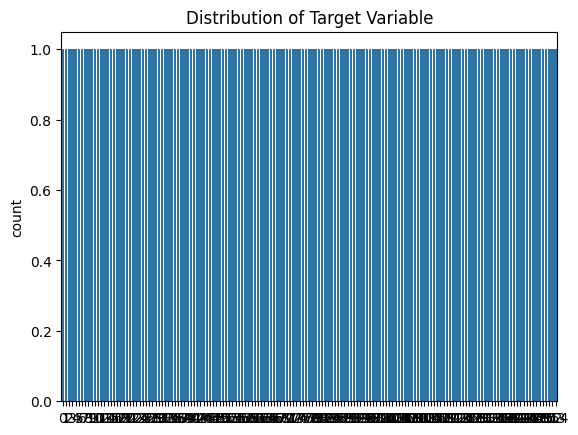

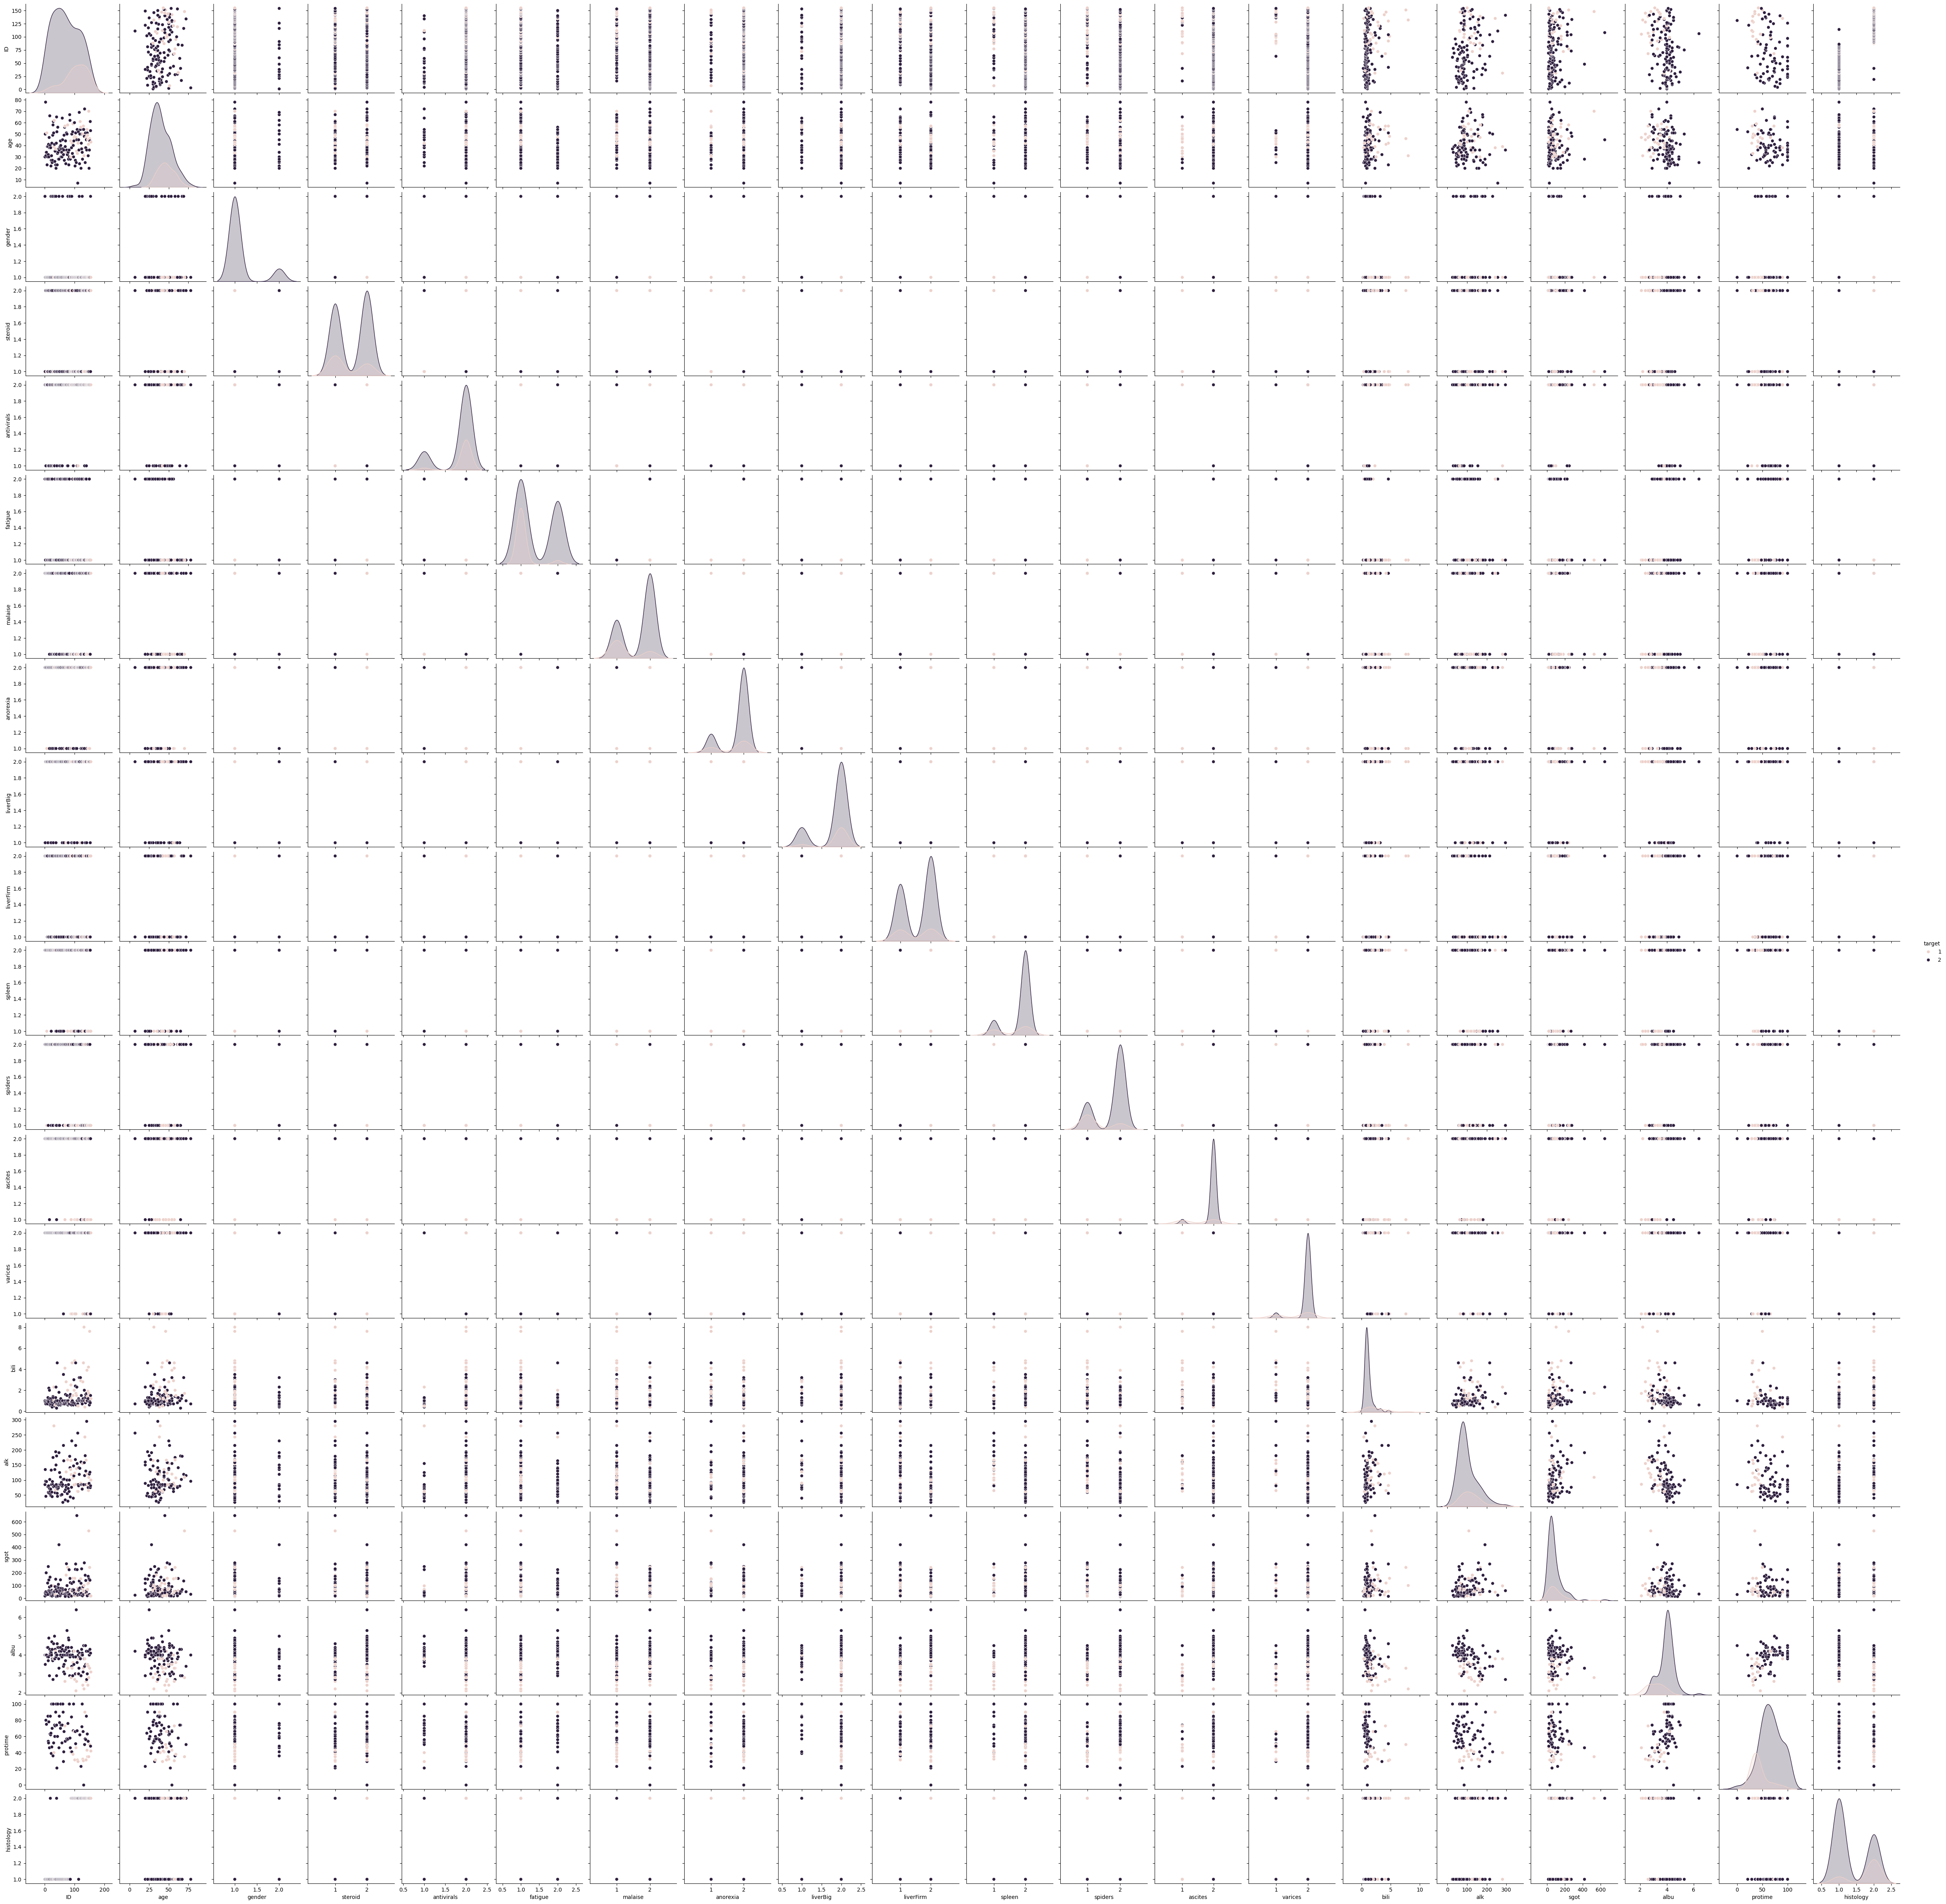

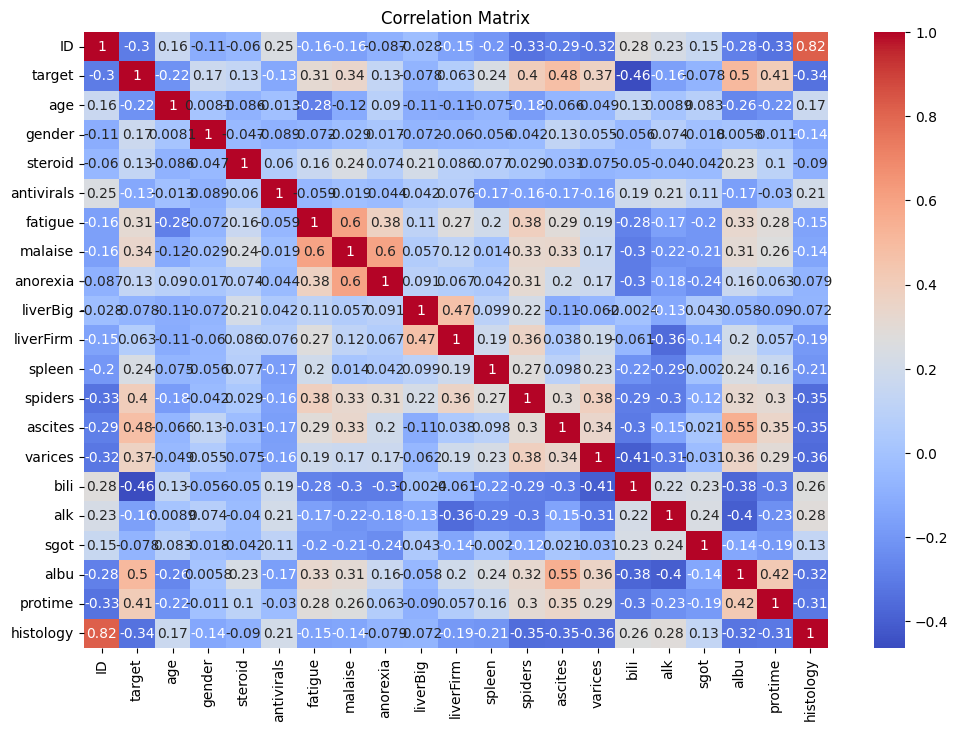

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of the target variable
sns.countplot(data['target'])
plt.title('Distribution of Target Variable')
plt.show()

# Pairplot to visualize relationships
sns.pairplot(data, hue='target')
plt.show()

# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### 3. Exploratory Data Analysis (EDA)

In [4]:
# Create new feature 'age_group'
data['age_group'] = pd.cut(data['age'], bins=[0, 30, 50, 100], labels=['young', 'middle_aged', 'old'])

# One-hot encode categorical features
data = pd.get_dummies(data, columns=['gender', 'age_group'], drop_first=True)

# Fill missing values with median of the column
data.fillna(data.median(), inplace=True)

# Drop 'ID' column as it is not useful for modeling
data.drop(columns=['ID'], inplace=True)

data.head()

,target,age,steroid,antivirals,fatigue,malaise,anorexia,liverBig,liverFirm,spleen,...,varices,bili,alk,sgot,albu,protime,histology,gender_2,age_group_middle_aged,age_group_old
0,2,30,1.0,2,2.0,2.0,2.0,1.0,2.0,2.0,...,2.0,1.0,85.0,18.0,4.0,61.0,1,True,False,False
1,2,50,1.0,2,1.0,2.0,2.0,1.0,2.0,2.0,...,2.0,0.9,135.0,42.0,3.5,61.0,1,False,True,False
2,2,78,2.0,2,1.0,2.0,2.0,2.0,2.0,2.0,...,2.0,0.7,96.0,32.0,4.0,61.0,1,False,False,True
3,2,31,2.0,1,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,0.7,46.0,52.0,4.0,80.0,1,False,True,False
4,2,34,2.0,2,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,1.0,85.0,200.0,4.0,61.0,1,False,True,False


### 4. Feature Engineering

In [5]:
from scipy.stats import ttest_ind

# T-test for age between target groups
group1 = data[data['target'] == 1]['age']
group2 = data[data['target'] == 2]['age']
ttest_result = ttest_ind(group1, group2)

print(f"T-test result for age: {ttest_result}")

T-test result for age: TtestResult(statistic=2.784896134176458, pvalue=0.006031402988543982, df=153.0)


### 5. Statistical Analysis

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Split the data into training and testing sets
X = data.drop(columns=['target'])
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.50      0.29      0.36         7
           2       0.81      0.92      0.86        24

    accuracy                           0.77        31
   macro avg       0.66      0.60      0.61        31
weighted avg       0.74      0.77      0.75        31

[[ 2  5]
 [ 2 22]]
